In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [3]:
data = pd.read_csv('India_GDP_1960-2022.csv')
data.head()

,Year,GDP_Billion,Per_Capita,Growth_Percent,Growth_Trend
0,2021,3173.40,182160,8.95,1
1,2020,2667.69,154640,-6.60,0
2,2019,2831.55,165760,3.74,1
3,2018,2702.93,159840,6.45,1
4,2017,2651.47,158480,6.80,1


In [4]:
data["Year"] = pd.to_numeric(data["Year"], errors='coerce')
data["GDP_Billion"] = pd.to_numeric(data["GDP_Billion"], errors='coerce')
data["Per_Capita"] = pd.to_numeric(data["Per_Capita"], errors='coerce')
data["Growth_Percent"] = pd.to_numeric(data["Growth_Percent"], errors='coerce')

# Define classification target: Growth_Trend (1 if Growth > 0, else 0)
data["Growth_Trend"] = (data["Growth_Percent"] > 0).astype(int)

In [5]:
data.to_csv("Cleaned_India_GDP_1960-2022.csv", index=False)
print("Data preprocessing completed and saved.")

Data preprocessing completed and saved.


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Selecting only two features for visualization
feature_cols = ['Year', 'GDP_Billion']
X = data[feature_cols].values
y = data["Growth_Trend"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Train-test split and feature scaling completed.")


Train-test split and feature scaling completed.


In [7]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Decision Tree model trained and predictions made.")

Decision Tree model trained and predictions made.


In [8]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9375
Confusion Matrix:
 [[ 0  0]
 [ 1 15]]


C:\Users\swaru\AppData\Local\Temp\ipykernel_1108\3052528644.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


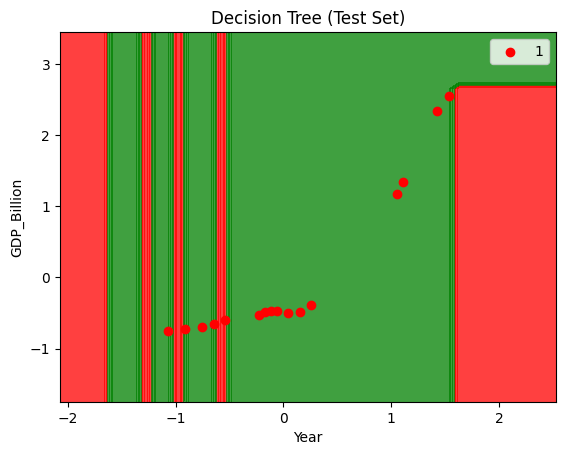

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.1),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.1))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha=0.75, cmap=ListedColormap(("red", "green")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c=ListedColormap(("red", "green"))(i), label=j)
plt.title("Decision Tree (Test Set)")
plt.xlabel("Year")
plt.ylabel("GDP_Billion")
plt.legend()
plt.show()

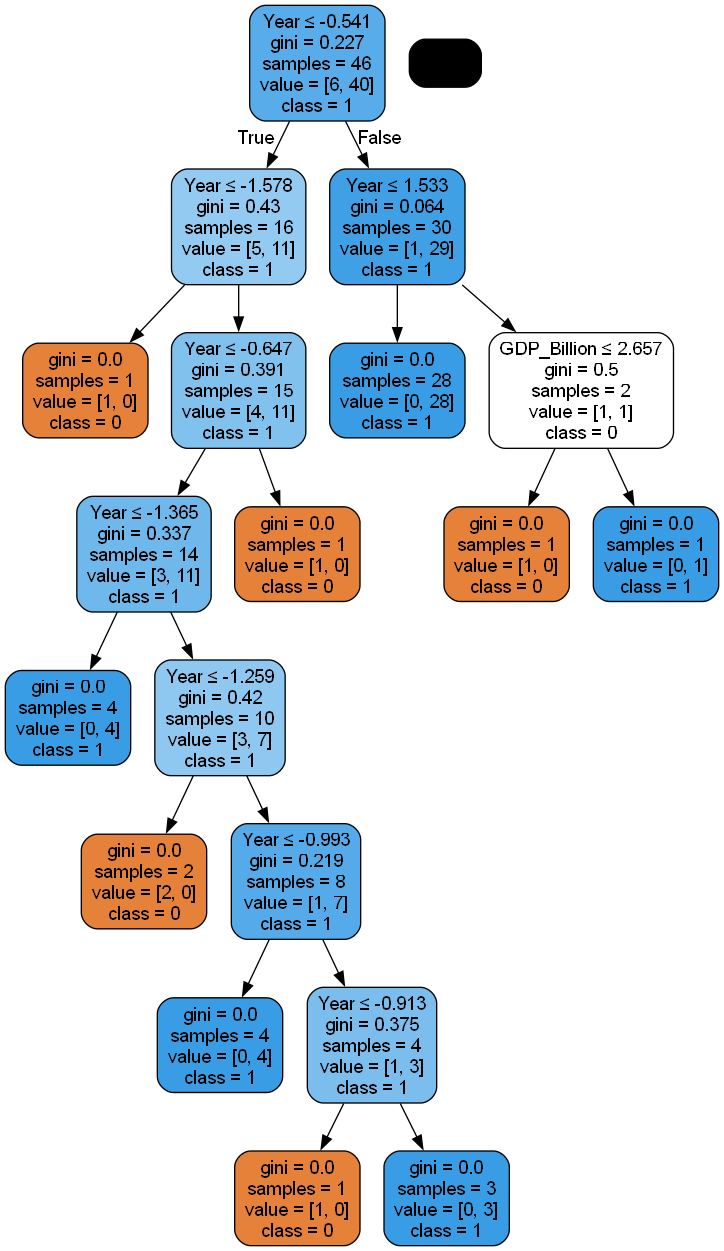

In [11]:
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
